In [15]:
# import dependencies
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [16]:
# create a list of latitudes and Longitudes and zip them
lat=np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lat,lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
coordinates

[(-87.3817581766258, -32.73761282639762),
 (-55.290370111510605, -15.711662979537039),
 (-11.23338167842833, 78.84036835128933),
 (-24.825893319233643, 147.6746159297851),
 (5.590800867590616, -53.55914107790575),
 (84.87972709039119, 67.46154768556607),
 (45.6344470328514, 144.64951762177293),
 (47.05166296770935, -149.6590838963365),
 (-29.20424941347065, -85.00801072852686),
 (-73.15030019525241, -176.95060582852062),
 (-73.13910214245979, -93.68423495455988),
 (48.695933789750825, 11.192571032358188),
 (42.890765683174294, -167.00582098998075),
 (54.21716209299689, 49.327895838644025),
 (-13.106663872940032, -89.42030366502149),
 (-69.70387127705177, 175.47397805255542),
 (-30.889650901633495, -2.6603846201956856),
 (2.589828174348952, -64.29315577286526),
 (-83.91915007921699, -141.1760617618011),
 (66.82683740174647, 144.53131328764186),
 (-54.53121954368616, 148.48078436671886),
 (-44.896384580347906, 27.91779453944551),
 (33.59808334349485, -173.0128600115559),
 (77.51073276646

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [20]:
cities

['ushuaia',
 'cape town',
 'hithadhoo',
 'emerald',
 'mana',
 'amderma',
 'novikovo',
 'kodiak',
 'coquimbo',
 'vaini',
 'punta arenas',
 'schrobenhausen',
 'bethel',
 'mullovka',
 'chicama',
 'kaitangata',
 'jamestown',
 'santa isabel do rio negro',
 'rikitea',
 'khonuu',
 'hobart',
 'port elizabeth',
 'kapaa',
 'qaanaaq',
 'bredasdorp',
 'flinders',
 'sibolga',
 'krasnoselkup',
 'hurghada',
 'khatanga',
 'nikolskoye',
 'butaritari',
 'mataura',
 'thinadhoo',
 'kenai',
 'yellowknife',
 'deputatskiy',
 'khandyga',
 'georgetown',
 'busselton',
 'leningradskiy',
 'hermanus',
 'bluff',
 'meulaboh',
 'dikson',
 'mount gambier',
 'hede',
 'albany',
 'hilo',
 'laguna',
 'balkanabat',
 'cascais',
 'huarmey',
 'buraydah',
 'puerto ayora',
 'east london',
 'tuktoyaktuk',
 'pisco',
 'komsomolskiy',
 'arraial do cabo',
 'natal',
 'hambantota',
 'keti bandar',
 'katsuura',
 'karaul',
 'tongliao',
 'poum',
 'tasiilaq',
 'barawe',
 'pyay',
 'cururupu',
 'luena',
 'belushya guba',
 'avarua',
 'provid

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)# Starting URL for Weather Map API Call.

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | novikovo
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | schrobenhausen
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | mullovka
Processing Record 15 of Set 1 | chicama
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | santa isabel do rio negro
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | khonuu
City not found. Skipping...
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | k

Processing Record 38 of Set 4 | alice springs
Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | fairbanks
Processing Record 41 of Set 4 | nacogdoches
Processing Record 42 of Set 4 | guane
Processing Record 43 of Set 4 | hearst
Processing Record 44 of Set 4 | amnat charoen
Processing Record 45 of Set 4 | pevek
Processing Record 46 of Set 4 | buin
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | biltine
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | lorengau
Processing Record 1 of Set 5 | hommelvik
Processing Record 2 of Set 5 | teya
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | chimbarongo
Processing Record 5 of Set 5 | french harbor
Processing Record 6 of Set 5 | burica
City not found. Skipping...
Processing Record 7 of Set 5 | pandan
Processing Record 8 of Set 5 | san lorenzo
Processing Record 9 of Set 5 | tessalit
Processing Record 10 of Set 5 | pochutla
Pro

City not found. Skipping...
Processing Record 23 of Set 8 | kabanjahe
Processing Record 24 of Set 8 | tadine
Processing Record 25 of Set 8 | plaridel
Processing Record 26 of Set 8 | sorochinsk
Processing Record 27 of Set 8 | chik
Processing Record 28 of Set 8 | northam
Processing Record 29 of Set 8 | magaria
Processing Record 30 of Set 8 | bandarawela
Processing Record 31 of Set 8 | buala
Processing Record 32 of Set 8 | workington
Processing Record 33 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 8 | oranjestad
Processing Record 35 of Set 8 | kofarnihon
City not found. Skipping...
Processing Record 36 of Set 8 | clyde river
Processing Record 37 of Set 8 | oistins
Processing Record 38 of Set 8 | nago
Processing Record 39 of Set 8 | carutapera
Processing Record 40 of Set 8 | phuket
Processing Record 41 of Set 8 | nhulunbuy
Processing Record 42 of Set 8 | chagda
City not found. Skipping...
Processing Record 43 of Set 8 | coruripe
Processing Record 44 of S

Processing Record 6 of Set 12 | nishihara
Processing Record 7 of Set 12 | bobrovka
Processing Record 8 of Set 12 | emmen
Processing Record 9 of Set 12 | bitung
Processing Record 10 of Set 12 | penzance
Processing Record 11 of Set 12 | baruun-urt
Processing Record 12 of Set 12 | padang
Processing Record 13 of Set 12 | sao raimundo nonato
Processing Record 14 of Set 12 | kandrian
Processing Record 15 of Set 12 | ambanja
Processing Record 16 of Set 12 | lompoc
Processing Record 17 of Set 12 | wanaka
Processing Record 18 of Set 12 | billings
Processing Record 19 of Set 12 | mayo
Processing Record 20 of Set 12 | chiang khong
Processing Record 21 of Set 12 | tiarei
Processing Record 22 of Set 12 | novo aripuana
Processing Record 23 of Set 12 | katobu
Processing Record 24 of Set 12 | manama
Processing Record 25 of Set 12 | luderitz
Processing Record 26 of Set 12 | bacuit
City not found. Skipping...
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | sao miguel do araguaia


In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.06,81,40,24.16,AR,2021-06-14 00:26:40
1,Cape Town,-33.9258,18.4232,54.12,79,16,4.61,ZA,2021-06-14 00:29:03
2,Hithadhoo,-0.6000,73.0833,82.18,75,99,10.07,MV,2021-06-14 00:29:04
3,Emerald,-23.5333,148.1667,69.94,100,90,2.30,AU,2021-06-14 00:29:04
4,Mana,5.6592,-53.7767,77.70,88,39,5.55,GF,2021-06-14 00:29:05


In [24]:
city_data_df=city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-06-14 00:26:40,-54.8000,-68.3000,37.06,81,40,24.16
1,Cape Town,ZA,2021-06-14 00:29:03,-33.9258,18.4232,54.12,79,16,4.61
2,Hithadhoo,MV,2021-06-14 00:29:04,-0.6000,73.0833,82.18,75,99,10.07
3,Emerald,AU,2021-06-14 00:29:04,-23.5333,148.1667,69.94,100,90,2.30
4,Mana,GF,2021-06-14 00:29:05,5.6592,-53.7767,77.70,88,39,5.55


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

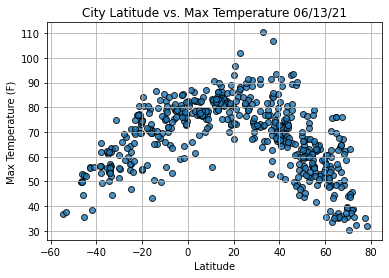

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

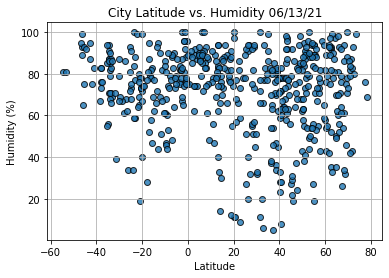

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

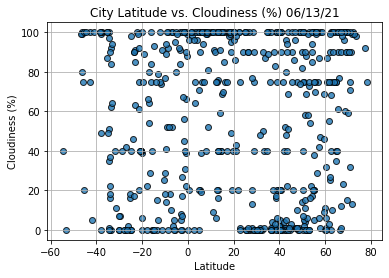

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

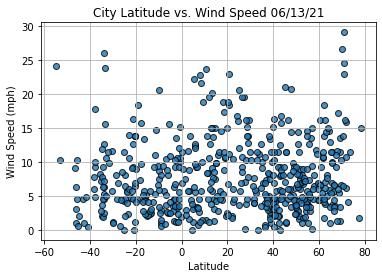

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()